In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Dec 17 10:40:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Import necessary libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import random
from matplotlib.patches import Rectangle
from lxml import etree

# Enable Matplotlib backend for displaying static images
%matplotlib inline

In [5]:
# Subfolders for the class labels

import os

train_path = '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images'
os.listdir(train_path)


['crease',
 'rolled_pit',
 'silk_spot',
 'water_spot',
 'welding_line',
 'punching_hole',
 'waist_folding',
 'crescent_gap',
 'oil_spot',
 'inclusion']

In [6]:
# Annotations of the class labels
label_path = '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/label/label'
os.listdir(label_path)

['img_07_4406645900_00570.xml',
 'img_03_4402270500_00004.xml',
 'img_04_4401672100_00003.xml',
 'img_07_425391000_00291.xml',
 'img_05_425244300_00741.xml',
 'img_03_SIS001540_00788.xml',
 'img_07_435974600_00223.xml',
 'img_06_425616500_00769.xml',
 'img_08_424826300_00950.xml',
 'img_08_4406743300_00400.xml',
 'img_03_425640100_00875.xml',
 'img_05_4406645900_00585.xml',
 'img_07_4404374100_01321.xml',
 'img_06_425614600_00424.xml',
 'img_06_3403399700_00746.xml',
 'img_07_425100400_00094.xml',
 'img_07_425390900_00074.xml',
 'img_04_436163100_00008.xml',
 'img_05_425505900_01176.xml',
 'img_06_425237000_00660.xml',
 'img_05_4406743300_00564.xml',
 'img_08_4403744200_01177.xml',
 'img_06_4406743300_00095.xml',
 'img_06_425506100_00177.xml',
 'img_06_425237000_00662.xml',
 'img_06_424826800_00497.xml',
 'img_05_425502100_00053.xml',
 'img_05_4406743300_00487.xml',
 'img_05_425505100_00053.xml',
 'img_08_4406743300_00433.xml',
 'img_07_4406645900_00897.xml',
 'img_07_4406645900_00647.

In [7]:
# Read all the images and count the number of image paths in the training subfolders

image_path = glob.glob("/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/*/*.jpg")
len(image_path)

2306

In [8]:
# Read all the annotation files and count the number of annotations in the training label folder

xmls_path = glob.glob("/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/label/label/*.xml")
len(xmls_path)

2280

In [9]:
# Sort the annotation and image files in ascending order

xmls_path.sort(key = lambda x:x.split("/")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("/")[-1].split(".jpg")[0])

In [10]:
# Extract the annotation filename without file extension

xmls_train = [path.split("/")[-1].split(".")[0] for path in xmls_path]
xmls_train[:5]

['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [11]:
# Retrieve the image filename to match the annotation file counts
# Ensure unique counts of training images with the annotations

imgs_train = [img for img in image_path if (img.split("/")[-1].split)(".jpg")[0] in xmls_train]
imgs_train[:5]

['/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/crescent_gap/img_01_3402617700_00001.jpg',
 '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/crescent_gap/img_01_3402617700_01009.jpg',
 '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/crease/img_01_3436789500_00004.jpg',
 '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/silk_spot/img_01_3436814600_00259.jpg',
 '/content/gdrive/MyDrive/CoderSchool/first_dataset_origin/images/images/silk_spot/img_01_3436815300_00473.jpg']

In [12]:
len(imgs_train),len(xmls_path)

(2280, 2280)

In [13]:
# Extract label names as DataFrame column

labels = [label.split("/")[-2] for label in imgs_train]
labels[:5]

['crescent_gap', 'crescent_gap', 'crease', 'silk_spot', 'silk_spot']

In [14]:
labels = pd.DataFrame(labels, columns = ["Defect Type"])
labels

,Defect Type
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [15]:
# One-hot encoding for multiple classes
from sklearn.preprocessing import LabelBinarizer

# Obtain training labels without duplication
Class = labels["Defect Type"].unique()
# Store data values in key:value pairs with Python dictionaries
Class_dict = dict(zip(Class, range(1,len(Class) + 1)))
labels["Class"] = labels["Defect Type"].apply(lambda x: Class_dict[x])

lb = LabelBinarizer()
# Fit label binarizer
lb.fit(list(Class_dict.values()))
# Convert multi-class labels to binary labels (belong or does not belong to the class)
transformed_labels = lb.transform(labels["Class"])
y_bin_labels = []  

for i in range(transformed_labels.shape[1]):
    y_bin_labels.append("Class" + str(i))
    labels["Class" + str(i + 1)] = transformed_labels[:, i]

In [16]:
Class_dict

{'crease': 2,
 'crescent_gap': 1,
 'inclusion': 6,
 'oil_spot': 7,
 'punching_hole': 10,
 'rolled_pit': 9,
 'silk_spot': 3,
 'waist_folding': 8,
 'water_spot': 4,
 'welding_line': 5}

In [17]:
labels.drop("Class", axis = 1, inplace = True)
labels.drop("Defect Type", axis = 1, inplace = True)
labels.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [18]:
# Function to parse and extract information from annotation files

def to_labels(path):
    # Read the annotation file
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    # Obtain the image width
    width = int(sel.xpath("//size/width/text()")[0])
    # Obtain the image height
    height = int(sel.xpath("//size/height/text()")[0])  
    # Extract the bounding box coordinates
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    # Return the relative coordinates
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [19]:
# Display the relative bounding box coordinates

coors = [to_labels(path) for path in xmls_path]
coors[:5]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249],
 [0.3642578125, 0.017, 0.49365234375, 0.993],
 [0.3974609375, 0.017, 0.7431640625, 0.978]]

In [20]:
# Set four coordinate points as outputs

xmin, ymin, xmax, ymax = list(zip(*coors))

# Convert to Numpy array
xmin = np.array(xmin)
ymin = np.array(ymin)
xmax = np.array(xmax)
ymax = np.array(ymax)
label = np.array(labels.values)

In [21]:
# Creates a Dataset whose elements are slices of the given tensors
# Slicing a 1D tensor produces scalar tensor elements

labels_dataset = tf.data.Dataset.from_tensor_slices((xmin, ymin, xmax, ymax, label))
labels_dataset

<TensorSliceDataset shapes: ((), (), (), (), (10,)), types: (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64)>

In [22]:
# Load the image from image path

def load_image(path):
    image = tf.io.read_file(path)                           
    image = tf.image.decode_jpeg(image,3)               
    image = tf.image.resize(image,[224,224])               
    image = tf.cast(image,tf.float32)  
    image = image / 255
    return image

In [23]:
# Build the dataset

dataset = tf.data.Dataset.from_tensor_slices(imgs_train)
dataset = dataset.map(load_image)

dataset_label = tf.data.Dataset.zip((dataset, labels_dataset))
dataset_label

<ZipDataset shapes: ((224, 224, 3), ((), (), (), (), (10,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64))>

In [24]:
# Shuffle the images and extract the images by the defined batch size

batch_size = 32
dataset_label = dataset_label.repeat().shuffle(500).batch(batch_size)

# Creates a Dataset that prefetches elements from this dataset
# Most dataset input pipelines should end with a call to prefetch
# This allows later elements to be prepared while the current element is being processed
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements

dataset_label = dataset_label.prefetch(tf.data.experimental.AUTOTUNE)

In [25]:
# Split the dataset into 80% for training and 20% for testing

train_count = int(len(imgs_train) * 0.8)
test_count = int(len(imgs_train) * 0.2)
train_count, test_count

(1824, 456)

In [26]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [27]:
class_dict = {v:k for k,v in Class_dict.items()}
class_dict

{1: 'crescent_gap',
 2: 'crease',
 3: 'silk_spot',
 4: 'water_spot',
 5: 'welding_line',
 6: 'inclusion',
 7: 'oil_spot',
 8: 'waist_folding',
 9: 'rolled_pit',
 10: 'punching_hole'}

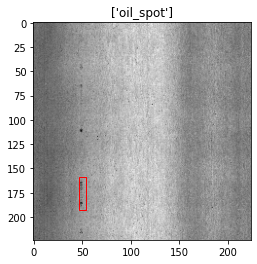

In [ ]:
# Display a sample training image with its label

for img, label in train_dataset.take(1):
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))     
    out1, out2, out3, out4, out5 = label                            
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax - xmin),(ymax - ymin), fill = False, color = "r")  
    ax = plt.gca()                      
    ax.axes.add_patch(rect)   
    pred_imglist = []
    pred_imglist.append(class_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

### VGG16

In [46]:
# Import VGG16 model with pre-trained weights from ImageNet

base_vgg16_2 = tf.keras.applications.VGG16(weights = "imagenet",
                                         include_top = False,
                                         input_shape = (224,224,3),
                                         pooling = 'avg')

58900480/58889256 [==============================] - 2s 0us/step


In [47]:
# Train the base model with fully-connected layers

base_vgg16_2.trainable = True

In [48]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_vgg16_2(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024,activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation = "relu")(x2)
out_class = keras.layers.Dense(10,activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

vgg16 = keras.models.Model(inputs = inputs, outputs = out)
vgg16.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 512)          14714688    ['input_5[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 1024)         525312      ['vgg16[0][0]']                  
                                                                                                  
 dense_4 (Dense)                (None, 1024)         525312      ['vgg16[0][0]']            

In [ ]:
# Compile the model with optimizer and loss functions

vgg16.compile(keras.optimizers.Adam(0.0005),
              loss = {"xmin": "mse",
                      "ymin": "mse",
                      "xmax": "mse",
                      "ymax": "mse",
                      "class": "categorical_crossentropy"},
              metrics = ["mae","acc"])

In [36]:
# Reduce learning rate

lr_reduce = keras.callbacks.ReduceLROnPlateau("val_loss", patience = 5, factor = 0.5, min_lr = 1e-6)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/CoderSchool/model/article_vgg16.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [ ]:
# Start training the model

history_vgg16 = vgg16.fit(train_dataset,
                    steps_per_epoch = train_count//batch_size,
                    epochs = 200,
                    validation_data = test_dataset,
                    validation_steps = test_count//batch_size,
                    callbacks = [checkpoint_callback, lr_reduce],
                    verbose = 1,
                    workers = -1)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 2.5577 - xmin_loss: 0.1389 - ymin_loss: 0.0821 - xmax_loss: 0.1119 - ymax_loss: 0.1273 - class_loss: 2.0974 - xmin_mae: 0.2891 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2367 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2727 - xmax_acc: 0.0729 - ymax_mae: 0.2877 - ymax_acc: 0.0598 - class_mae: 0.1686 - class_acc: 0.2697
Epoch 00001: val_loss improved from inf to 2.22797, saving model to /content/gdrive/MyDrive/CoderSchool/model/article_vgg16.h5
57/57 [==============================] - 87s 296ms/step - loss: 2.5577 - xmin_loss: 0.1389 - ymin_loss: 0.0821 - xmax_loss: 0.1119 - ymax_loss: 0.1273 - class_loss: 2.0974 - xmin_mae: 0.2891 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2367 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2727 - xmax_acc: 0.0729 - ymax_mae: 0.2877 - ymax_acc: 0.0598 - class_mae: 0.1686 - class_acc: 0.2697 - val_loss: 2.2280 - val_xmin_loss: 0.1020 - val_ymin_loss: 0.0758 - val_xmax_loss: 0.1272 - val_ymax_loss: 0.0796 - val_cla

In [40]:
# Visualize the results after training

def plot_history(history):                
    hist = pd.DataFrame(history.history)           
    hist["epoch"] = history.epoch
    
    plt.figure()                                     
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")               
    plt.plot(hist["epoch"], hist["loss"], label = "training Loss")
    plt.plot(hist["epoch"], hist["val_loss"], label = "validation Loss")                           
    plt.legend()
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Mean Absolute Error (MAE)")               
    plt.plot(hist["epoch"], hist["val_xmin_mae"], label = "xmin_MAE")
    plt.plot(hist["epoch"], hist["val_ymin_mae"], label = "ymin_MAE")
    plt.plot(hist["epoch"], hist["val_xmax_mae"], label = "xmax_MAE")
    plt.plot(hist["epoch"], hist["val_ymax_mae"], label = "ymax_MAE")
    plt.legend()      
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy for Class")               
    plt.plot(hist["epoch"],hist["val_class_acc"], label = "class_accuracy")
    
    plt.show()
    
# plot_history(history_vgg16)  

In [ ]:
results = vgg16.evaluate(test_dataset)

456/456 [==============================] - 61s 130ms/step - loss: 0.0028 - xmin_loss: 4.2222e-04 - ymin_loss: 9.0779e-04 - xmax_loss: 4.2447e-04 - ymax_loss: 0.0011 - class_loss: 1.8903e-05 - xmin_mae: 0.0119 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0166 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0120 - xmax_acc: 0.0920 - ymax_mae: 0.0176 - ymax_acc: 0.0777 - class_mae: 3.7794e-06 - class_acc: 1.0000


In [ ]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.011928621679544449
MAE of ymin value in test set:0.016557995229959488
MAE of xmax value in test set:0.011994411237537861
MAE of ymax value in test set:0.01763319969177246
Testing accuracy of predicted label:1.0


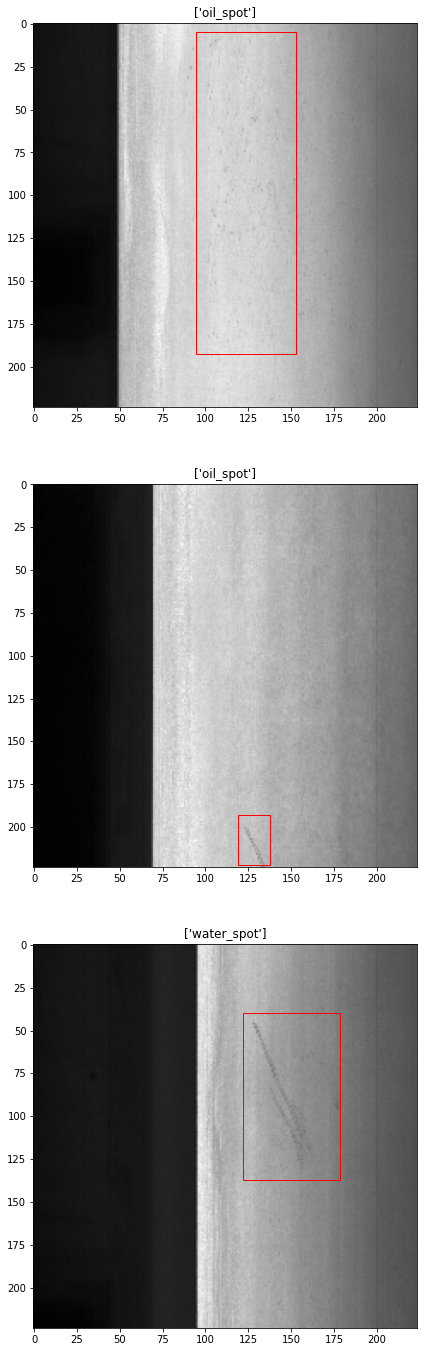

In [ ]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = vgg16.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [49]:
# Append all the true labels into a list

true_labels = []

for _, label in test_dataset:    
    out1, out2, out3, out4, out5 = label                              
    true_labels.append(class_dict[np.argmax(out5) + 1])

In [50]:
true_labels

['silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 'punching_hole',
 'punching_hole',
 'punching_hole',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'welding_line',
 'water_spot',
 'oil_spot',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'welding_line',
 'oil_spot',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'waist_folding',
 'rolled_pit',
 'welding_line',
 'waist_folding',
 'silk_spot',
 'punching_hole',
 'inclusion',
 'silk_spot',
 'oil_spot',
 'inclusion',
 'oil_spot',
 'crescent_gap',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'welding_line',
 'rolled_pit',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'inclusion',
 'crescent_gap',
 'silk_spot',
 'inclusion',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'punching_hole',
 'crescent_gap',
 'oil_spot',
 'silk_spot',
 'silk_spot',
 

In [ ]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = vgg16.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [ ]:
test_labels

['inclusion',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'water_spot',
 'crescent_gap',
 'inclusion',
 'water_spot',
 'water_spot',
 'oil_spot',
 'water_spot',
 'water_spot',
 'welding_line',
 'punching_hole',
 'welding_line',
 'welding_line',
 'water_spot',
 'silk_spot',
 'punching_hole',
 'punching_hole',
 'water_spot',
 'welding_line',
 'silk_spot',
 'punching_hole',
 'welding_line',
 'water_spot',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'waist_folding',
 'punching_hole',
 'water_spot',
 'punching_hole',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'silk_spot',
 'punching_hole',
 'punching_hole',
 'waist_folding',
 'silk_spot',
 'oil_spot',
 'punching_hole',
 'oil_spot',
 'oil_spot',
 'punching_hole',
 'silk_spot',
 'water_spot',
 'crescent_gap',
 'crescent_gap',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'crescent_gap',
 'water_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'crescent_gap

In [56]:
target_names = ['cresent_gap', 'crease', 'silk_spot', 'water_spot', 'welding_line', 
                'inclusion', 'oil_spot', 'waist_folding', 'rolled_pit', 'punching_hole']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.08      0.17      0.11         6
       crease       0.15      0.15      0.15        47
    silk_spot       0.15      0.13      0.14        46
   water_spot       0.10      0.09      0.09        45
 welding_line       0.08      0.11      0.09        36
    inclusion       0.00      0.00      0.00         8
     oil_spot       0.30      0.29      0.30       123
waist_folding       0.07      0.08      0.08        24
   rolled_pit       0.20      0.21      0.20        63
punching_hole       0.05      0.03      0.04        58

     accuracy                           0.16       456
    macro avg       0.12      0.13      0.12       456
 weighted avg       0.17      0.16      0.16       456



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  5, 36, 16, 11, 11,  7,  7,  1, 12],
       [ 0,  0, 12, 13, 11,  9,  3,  2,  1,  8],
       [ 0,  0, 14, 10,  2,  3,  9,  2,  0, 12],
       [ 0,  2, 14,  2,  2,  6,  9,  1,  2,  3],
       [ 0,  0, 11,  6,  2,  3,  4,  6,  2,  6],
       [ 0,  2,  8,  2,  2,  2,  2,  2,  0,  1],
       [ 0,  0,  2,  2,  1,  0,  0,  1,  0,  2],
       [ 0,  1,  7,  6,  7,  3,  3,  4,  0,  4]])

### Xception

In [28]:
# Import Xception model with pre-trained weights from ImageNet

base_xception = tf.keras.applications.Xception(weights = "imagenet",
                                               include_top = False,
                                               input_shape = (224,224,3),
                                               pooling = 'avg')

83697664/83683744 [==============================] - 1s 0us/step


In [29]:
# Train the base model with fully-connected layers

base_xception.trainable = True

In [30]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_xception(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

xception = keras.models.Model(inputs = inputs, outputs = out)
xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 2048)         20861480    ['input_2[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 1024)         2098176     ['xception[0][0]']               
                                                                                                  
 dense (Dense)                  (None, 1024)         2098176     ['xception[0][0]']           

In [31]:
# Compile the model with optimizer and loss functions

xception.compile(keras.optimizers.Adam(0.0005),
                 loss = {"xmin": "mse",
                         "ymin": "mse",
                         "xmax": "mse",
                         "ymax": "mse",
                         "class": "categorical_crossentropy"},
                 metrics = ["mae","acc"])

In [32]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/CoderSchool/model/article_Xception.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [37]:
# Start training the model

history_xception = xception.fit(train_dataset,
                       steps_per_epoch = train_count//batch_size,
                       epochs = 200,
                       validation_data = test_dataset,
                       validation_steps = test_count//batch_size,
                       callbacks = [checkpoint_callback, lr_reduce],
                       verbose = 1,
                       workers = -1)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 1.9492 - xmin_loss: 0.0984 - ymin_loss: 0.0743 - xmax_loss: 0.1181 - ymax_loss: 0.1363 - class_loss: 1.5220 - xmin_mae: 0.2390 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2016 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2664 - xmax_acc: 0.0702 - ymax_mae: 0.2904 - ymax_acc: 0.0548 - class_mae: 0.1268 - class_acc: 0.4819
Epoch 00001: val_loss improved from inf to 1.34148, saving model to /content/gdrive/MyDrive/CoderSchool/model/article_Xception.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


57/57 [==============================] - 515s 620ms/step - loss: 1.9492 - xmin_loss: 0.0984 - ymin_loss: 0.0743 - xmax_loss: 0.1181 - ymax_loss: 0.1363 - class_loss: 1.5220 - xmin_mae: 0.2390 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2016 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2664 - xmax_acc: 0.0702 - ymax_mae: 0.2904 - ymax_acc: 0.0548 - class_mae: 0.1268 - class_acc: 0.4819 - val_loss: 1.3415 - val_xmin_loss: 0.0519 - val_ymin_loss: 0.0462 - val_xmax_loss: 0.0876 - val_ymax_loss: 0.1618 - val_class_loss: 0.9941 - val_xmin_mae: 0.1698 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.1565 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.2458 - val_xmax_acc: 0.0848 - val_ymax_mae: 0.3466 - val_ymax_acc: 0.0603 - val_class_mae: 0.1059 - val_class_acc: 0.7031 - lr: 5.0000e-04
Epoch 2/200
57/57 [==============================] - ETA: 0s - loss: 0.9147 - xmin_loss: 0.0474 - ymin_loss: 0.0422 - xmax_loss: 0.0564 - ymax_loss: 0.0529 - class_loss: 0.7159 - xmin_mae: 0.1637 - xmin_acc: 0.0000e+00 - ymin_mae:

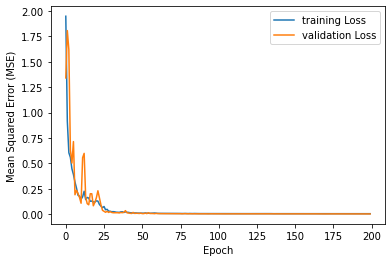

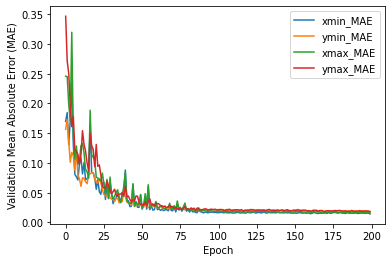

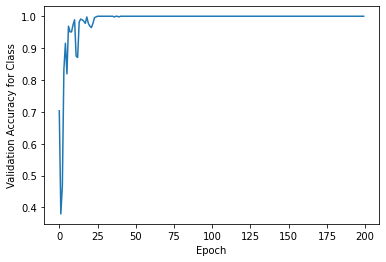

In [41]:
plot_history(history_xception)  

In [42]:
results = xception.evaluate(test_dataset)

456/456 [==============================] - 64s 136ms/step - loss: 0.0021 - xmin_loss: 4.2338e-04 - ymin_loss: 6.2669e-04 - xmax_loss: 4.8384e-04 - ymax_loss: 5.8571e-04 - class_loss: 1.5431e-06 - xmin_mae: 0.0148 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0180 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0160 - xmax_acc: 0.0917 - ymax_mae: 0.0176 - ymax_acc: 0.0780 - class_mae: 3.1008e-07 - class_acc: 1.0000


In [43]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.014790920540690422
MAE of ymin value in test set:0.018001137301325798
MAE of xmax value in test set:0.016036201268434525
MAE of ymax value in test set:0.017630932852625847
Testing accuracy of predicted label:1.0


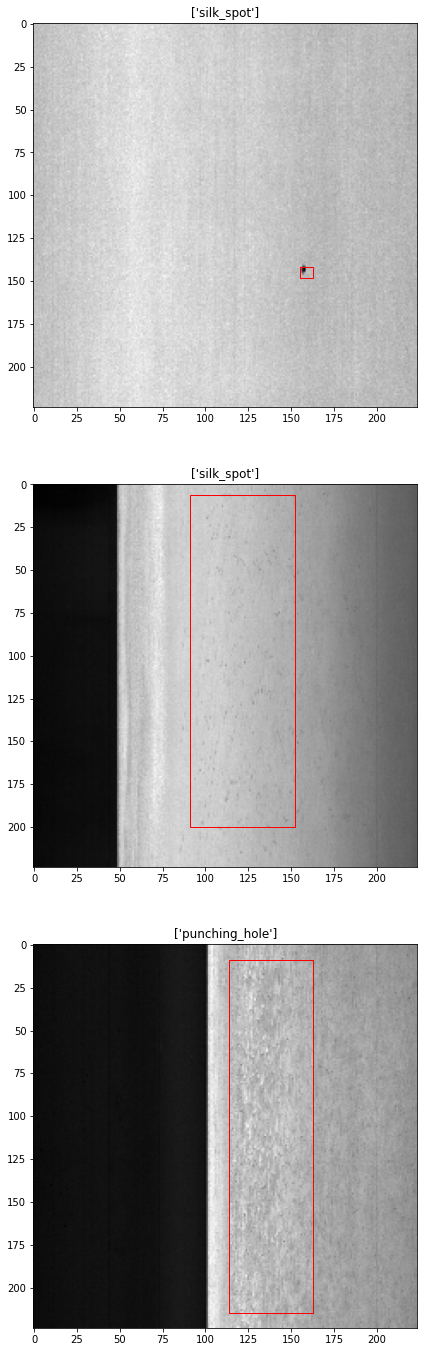

In [51]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = xception.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [52]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = xception.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [53]:
test_labels

['silk_spot',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'oil_spot',
 'inclusion',
 'silk_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'welding_line',
 'punching_hole',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'punching_hole',
 'welding_line',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'inclusion',
 'waist_folding',
 'crescent_gap',
 'crescent_gap',
 'inclusion',
 'inclusion',
 'punching_hole',
 'welding_line',
 'crescent_gap',
 'crescent_gap',
 'silk_spot',
 'silk_spot',
 'waist_folding',
 'crescent_gap',
 'inclusion',
 'waist_folding',
 'punching_hole',
 'inclusion',
 'waist_folding',
 'waist_folding',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'waist_folding',
 'welding_line',
 'crescent_gap',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'waist_folding',
 'silk_

In [57]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         7
       crease       0.07      0.07      0.07        45
    silk_spot       0.15      0.14      0.14        43
   water_spot       0.07      0.05      0.06        38
 welding_line       0.10      0.14      0.12        35
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.35      0.30      0.32       152
waist_folding       0.19      0.26      0.22        27
   rolled_pit       0.16      0.19      0.17        53
punching_hole       0.17      0.18      0.18        50

     accuracy                           0.19       456
    macro avg       0.13      0.13      0.13       456
 weighted avg       0.20      0.19      0.19       456



In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  5, 45, 20, 16, 17,  8, 11,  3, 15],
       [ 0,  2, 19, 10,  8,  2,  4,  1,  1,  3],
       [ 0,  0, 15,  7,  9,  3,  2,  2,  0,  8],
       [ 0,  0,  9,  4,  4,  6,  4,  3,  0,  5],
       [ 0,  0,  8,  7,  4,  3,  2,  3,  0,  6],
       [ 0,  0,  5,  3,  1,  4,  3,  7,  0,  1],
       [ 0,  0,  3,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  8,  7,  4,  3,  1,  3,  0,  5]])

### InceptionResNetV2

In [59]:
# Import InceptionResNetV2 model with pre-trained weights from ImageNet

base_inceptionresnetv2 = tf.keras.applications.InceptionResNetV2(weights = "imagenet",
                                                                 include_top = False,
                                                                 input_shape = (224,224,3),
                                                                 pooling = 'avg')

219070464/219055592 [==============================] - 1s 0us/step


In [60]:
# Train the base model with fully-connected layers

base_inceptionresnetv2.trainable = True

In [61]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_inceptionresnetv2(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

inceptionresnetv2 = keras.models.Model(inputs = inputs, outputs = out)
inceptionresnetv2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 1536)        54336736    ['input_7[0][0]']                
 l)                                                                                               
                                                                                                  
 dense_10 (Dense)               (None, 1024)         1573888     ['inception_resnet_v2[0][0]']    
                                                                                            

In [62]:
# Compile the model with optimizer and loss functions

inceptionresnetv2.compile(keras.optimizers.Adam(0.0005),
                          loss = {"xmin": "mse",
                                  "ymin": "mse",
                                  "xmax": "mse",
                                  "ymax": "mse",
                                  "class": "categorical_crossentropy"},
                          metrics = ["mae","acc"])

In [63]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/CoderSchool/model/article_Inception.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [64]:
# Start training the model

history_inception = inceptionresnetv2.fit(train_dataset,
                                steps_per_epoch = train_count//batch_size,
                                epochs = 200,
                                validation_data = test_dataset,
                                validation_steps = test_count//batch_size,
                                callbacks = [lr_reduce,checkpoint_callback],
                                verbose = 1,
                                workers = -1)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 1.7566 - xmin_loss: 0.0800 - ymin_loss: 0.1057 - xmax_loss: 0.0943 - ymax_loss: 0.0930 - class_loss: 1.3836 - xmin_mae: 0.2217 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2266 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2366 - xmax_acc: 0.0806 - ymax_mae: 0.2397 - ymax_acc: 0.0685 - class_mae: 0.1156 - class_acc: 0.5384
Epoch 00001: val_loss improved from inf to 3.16595, saving model to /content/gdrive/MyDrive/CoderSchool/model/article_Inception.h5
57/57 [==============================] - 123s 823ms/step - loss: 1.7566 - xmin_loss: 0.0800 - ymin_loss: 0.1057 - xmax_loss: 0.0943 - ymax_loss: 0.0930 - class_loss: 1.3836 - xmin_mae: 0.2217 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2266 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2366 - xmax_acc: 0.0806 - ymax_mae: 0.2397 - ymax_acc: 0.0685 - class_mae: 0.1156 - class_acc: 0.5384 - val_loss: 3.1659 - val_xmin_loss: 0.1007 - val_ymin_loss: 0.0798 - val_xmax_loss: 0.1110 - val_ymax_loss: 0.2487 - va

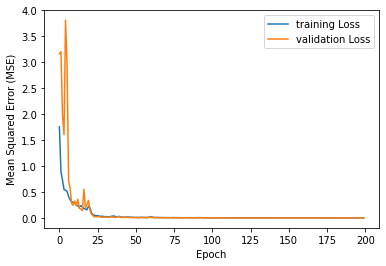

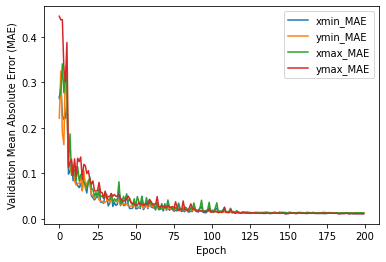

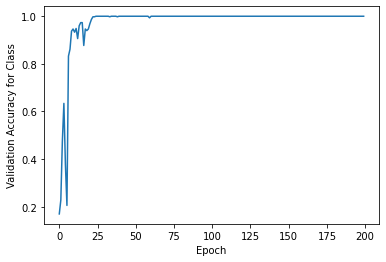

In [65]:
plot_history(history_inception) 

In [66]:
results = inceptionresnetv2.evaluate(test_dataset)

456/456 [==============================] - 75s 159ms/step - loss: 0.0011 - xmin_loss: 2.3586e-04 - ymin_loss: 2.7606e-04 - xmax_loss: 2.8187e-04 - ymax_loss: 2.6303e-04 - class_loss: 2.7663e-06 - xmin_mae: 0.0116 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0124 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0126 - xmax_acc: 0.0925 - ymax_mae: 0.0122 - ymax_acc: 0.0778 - class_mae: 5.5437e-07 - class_acc: 1.0000


In [67]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.011599326506257057
MAE of ymin value in test set:0.01240638829767704
MAE of xmax value in test set:0.012626671232283115
MAE of ymax value in test set:0.012166043743491173
Testing accuracy of predicted label:1.0


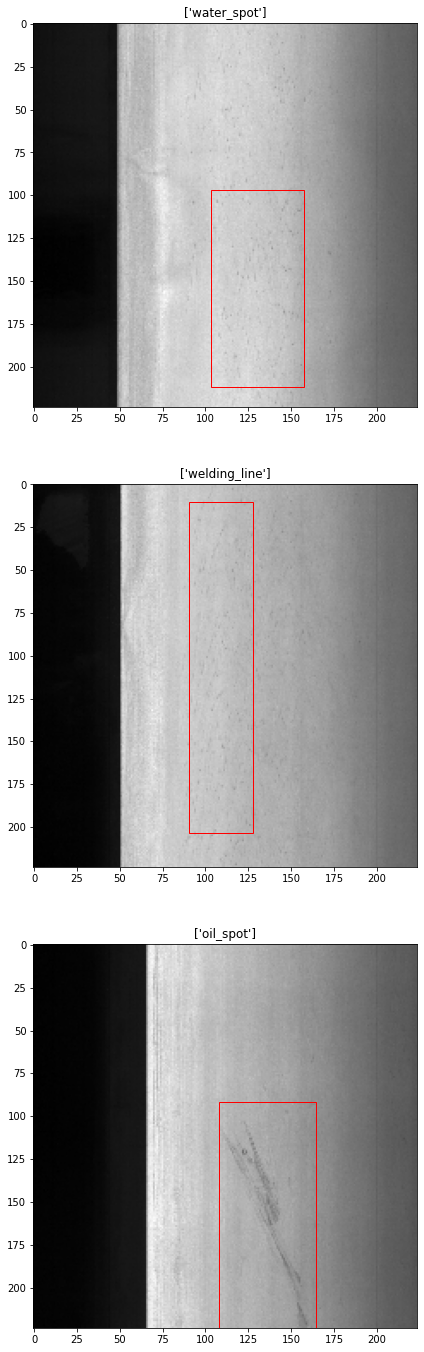

In [68]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = inceptionresnetv2.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [69]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = inceptionresnetv2.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [70]:
test_labels

['silk_spot',
 'waist_folding',
 'inclusion',
 'crescent_gap',
 'silk_spot',
 'water_spot',
 'welding_line',
 'water_spot',
 'welding_line',
 'oil_spot',
 'silk_spot',
 'silk_spot',
 'oil_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'inclusion',
 'crescent_gap',
 'silk_spot',
 'punching_hole',
 'punching_hole',
 'crease',
 'punching_hole',
 'inclusion',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'welding_line',
 'welding_line',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'welding_line',
 'silk_spot',
 'water_spot',
 'crescent_gap',
 'punching_hole',
 'crease',
 'crescent_gap',
 'waist_folding',
 'punching_hole',
 'oil_spot',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'welding_line',
 'crescent_gap',
 'oil_spot',
 'silk_spot',
 'oil_spot',
 'oil_spot',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'oil_spot',
 'oil_spot',
 'crescent_gap',
 'inclusion',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crease',


In [71]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         7
       crease       0.10      0.11      0.11        45
    silk_spot       0.09      0.09      0.09        43
   water_spot       0.02      0.03      0.03        38
 welding_line       0.11      0.11      0.11        35
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.33      0.30      0.31       152
waist_folding       0.06      0.07      0.07        27
   rolled_pit       0.14      0.15      0.15        53
punching_hole       0.07      0.06      0.06        50

     accuracy                           0.16       456
    macro avg       0.09      0.09      0.09       456
 weighted avg       0.17      0.16      0.16       456



In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  1,  0,  0,  1,  1,  0],
       [ 0,  1, 45, 21, 15, 15, 15,  9,  2, 11],
       [ 0,  0, 18,  8,  6,  3,  3,  3,  0,  5],
       [ 0,  0, 16,  5,  3,  6,  7,  3,  2,  2],
       [ 0,  2,  8,  6,  4,  4,  7,  5,  1,  3],
       [ 0,  2, 10,  5,  2,  8,  1,  4,  1,  3],
       [ 0,  2,  9,  2,  4,  2,  0,  2,  0,  2],
       [ 0,  0,  0,  0,  1,  0,  3,  0,  0,  2],
       [ 0,  0, 10,  6,  2,  4,  4,  1,  1,  4]])

### ResNet152V2

In [73]:
# Import InceptionResNetV2 model with pre-trained weights from ImageNet

base_resnet152v2 = tf.keras.applications.ResNet152V2(weights = "imagenet",
                                                     include_top = False,
                                                     input_shape = (224,224,3),
                                                     pooling = 'avg')

234561536/234545216 [==============================] - 3s 0us/step


In [74]:
# Train the base model with fully-connected layers

base_resnet152v2.trainable = True

In [75]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_resnet152v2(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

resnet152v2 = keras.models.Model(inputs = inputs, outputs = out)
resnet152v2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet152v2 (Functional)       (None, 2048)         58331648    ['input_9[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 1024)         2098176     ['resnet152v2[0][0]']            
                                                                                                  
 dense_12 (Dense)               (None, 1024)         2098176     ['resnet152v2[0][0]']      

In [76]:
# Compile the model with optimizer and loss functions

resnet152v2.compile(keras.optimizers.Adam(0.0005),
                    loss = {"xmin": "mse",
                            "ymin": "mse",
                            "xmax": "mse",
                            "ymax": "mse",
                            "class": "categorical_crossentropy"},
                    metrics = ["mae","acc"])

In [77]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/gdrive/MyDrive/CoderSchool/model/article_ResNet.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

In [79]:
# Start training the model

history_ResNet = resnet152v2.fit(train_dataset,
                          steps_per_epoch = train_count//batch_size,
                          epochs = 200,
                          validation_data = test_dataset,
                          validation_steps = test_count//batch_size,
                          callbacks = [lr_reduce, checkpoint_callback],
                          verbose = 1,
                          workers = -1)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 0.1217 - xmin_loss: 0.0122 - ymin_loss: 0.0140 - xmax_loss: 0.0131 - ymax_loss: 0.0174 - class_loss: 0.0650 - xmin_mae: 0.0774 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0830 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0825 - xmax_acc: 0.0910 - ymax_mae: 0.0967 - ymax_acc: 0.0789 - class_mae: 0.0079 - class_acc: 0.9770
Epoch 00001: val_loss improved from 0.24503 to 0.15809, saving model to /content/gdrive/MyDrive/CoderSchool/model/article_ResNet.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


57/57 [==============================] - 92s 590ms/step - loss: 0.1217 - xmin_loss: 0.0122 - ymin_loss: 0.0140 - xmax_loss: 0.0131 - ymax_loss: 0.0174 - class_loss: 0.0650 - xmin_mae: 0.0774 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0830 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0825 - xmax_acc: 0.0910 - ymax_mae: 0.0967 - ymax_acc: 0.0789 - class_mae: 0.0079 - class_acc: 0.9770 - val_loss: 0.1581 - val_xmin_loss: 0.0136 - val_ymin_loss: 0.0143 - val_xmax_loss: 0.0238 - val_ymax_loss: 0.0204 - val_class_loss: 0.0860 - val_xmin_mae: 0.0839 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.0872 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.1194 - val_xmax_acc: 0.1205 - val_ymax_mae: 0.1069 - val_ymax_acc: 0.0938 - val_class_mae: 0.0112 - val_class_acc: 0.9688 - lr: 2.5000e-04
Epoch 2/200
57/57 [==============================] - ETA: 0s - loss: 0.1107 - xmin_loss: 0.0118 - ymin_loss: 0.0136 - xmax_loss: 0.0153 - ymax_loss: 0.0181 - class_loss: 0.0519 - xmin_mae: 0.0728 - xmin_acc: 0.0000e+00 - ymin_mae: 

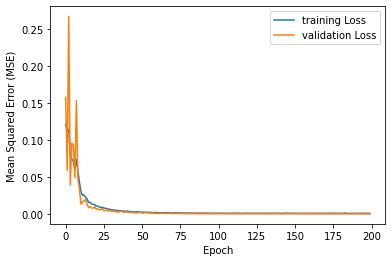

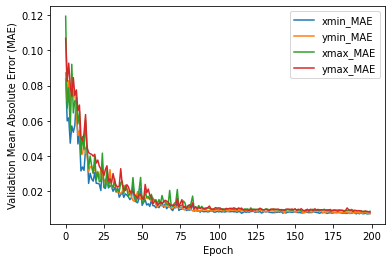

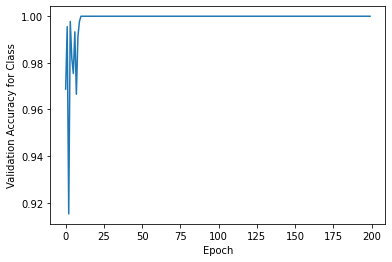

In [80]:
plot_history(history_ResNet)

In [81]:
results = resnet152v2.evaluate(test_dataset)

456/456 [==============================] - 69s 147ms/step - loss: 4.6737e-04 - xmin_loss: 1.0058e-04 - ymin_loss: 1.1140e-04 - xmax_loss: 1.1043e-04 - ymax_loss: 1.4231e-04 - class_loss: 2.6524e-06 - xmin_mae: 0.0076 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0081 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0081 - xmax_acc: 0.0920 - ymax_mae: 0.0089 - ymax_acc: 0.0773 - class_mae: 5.3238e-07 - class_acc: 1.0000


In [82]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.007562811020761728
MAE of ymin value in test set:0.00809018686413765
MAE of xmax value in test set:0.008062767796218395
MAE of ymax value in test set:0.00894785113632679
Testing accuracy of predicted label:1.0


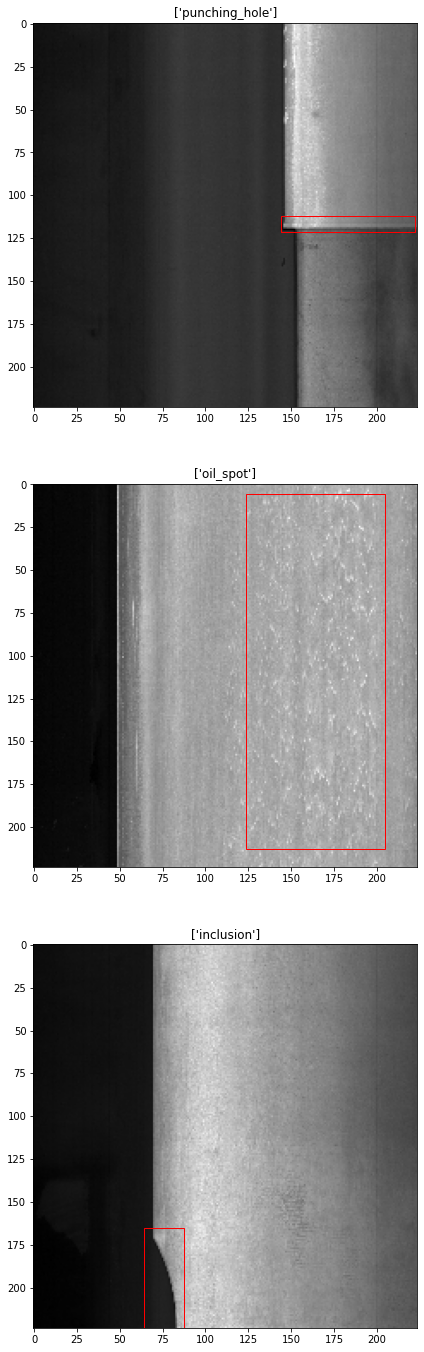

In [83]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = resnet152v2.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [84]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = resnet152v2.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [85]:
test_labels

['water_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'waist_folding',
 'welding_line',
 'water_spot',
 'punching_hole',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'punching_hole',
 'punching_hole',
 'water_spot',
 'water_spot',
 'welding_line',
 'water_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'punching_hole',
 'punching_hole',
 'oil_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 'punching_hole',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'crescent_gap',
 'water_spot',
 'inclusion',
 'silk_spot',
 'waist_folding',
 'silk_spot',
 'silk_spot',
 'punching_hole',
 'inclusion',
 'oil_spot',
 'welding_line',
 'oil_spot',
 'waist_folding',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'inclusion',
 'inclusion',
 'oil_spot',
 'silk_spot',
 'oil_spot',
 'oil_spot',
 'oil_spot',
 'inclusion',
 'oil_spot',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'oil_spot',
 'silk_sp

In [86]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         7
       crease       0.05      0.04      0.05        45
    silk_spot       0.03      0.02      0.02        43
   water_spot       0.08      0.11      0.09        38
 welding_line       0.16      0.20      0.18        35
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.34      0.28      0.31       152
waist_folding       0.10      0.11      0.11        27
   rolled_pit       0.16      0.21      0.18        53
punching_hole       0.09      0.08      0.08        50

     accuracy                           0.16       456
    macro avg       0.10      0.11      0.10       456
 weighted avg       0.17      0.16      0.17       456



In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  2,  1,  1,  0,  0],
       [ 0,  3, 43, 20, 13, 14, 17, 12,  2,  7],
       [ 0,  2, 11, 11,  7,  6,  4,  1,  1,  4],
       [ 0,  0, 14, 11,  4,  7,  0,  4,  1,  7],
       [ 0,  1,  9,  7,  3,  1,  9,  3,  1,  5],
       [ 0,  0, 11,  5,  3,  3,  4,  3,  1,  5],
       [ 0,  0,  9,  2,  3,  2,  1,  3,  0,  5],
       [ 0,  0,  3,  1,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 13,  5,  3,  1,  3,  2,  0,  7]])